In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

MinMaxScaler transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.

MinMaxScaler doesn’t reduce the effect of outliers, but it linearily scales them down into a fixed range, where the largest occuring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [2]:
X = np.array([[5,7],[8,4],[3,3],[4,4],[3,7],[6,7],[6,1],[5,5]])
X

array([[5, 7],
       [8, 4],
       [3, 3],
       [4, 4],
       [3, 7],
       [6, 7],
       [6, 1],
       [5, 5]])

In [3]:
scaler = MinMaxScaler()

In [4]:
scaled_X = scaler.fit_transform(X)
scaled_X

array([[0.4       , 1.        ],
       [1.        , 0.5       ],
       [0.        , 0.33333333],
       [0.2       , 0.5       ],
       [0.        , 1.        ],
       [0.6       , 1.        ],
       [0.6       , 0.        ],
       [0.4       , 0.66666667]])

In [5]:
dbscan = DBSCAN(eps=3.5, min_samples=3)
cluster_labels = dbscan.fit_predict(scaled_X)
np.unique(cluster_labels)

array([0], dtype=int64)

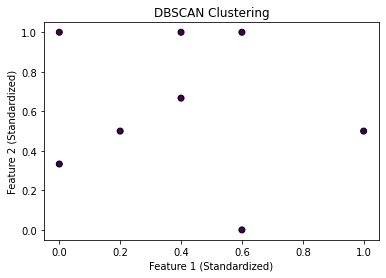

In [6]:
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=cluster_labels,cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()